In [2]:
from bs4 import BeautifulSoup
import requests

In [2]:
genre_url = 'https://www.boxofficemojo.com/genre/?sort=totalGross&ref_=bo_gs__resort#table'
genre_response = requests.get(genre_url)
genre_response.status_code #200 looks good!

200

In [3]:
genre_page = genre_response.text

In [4]:
#create BeautifulSoup obj, unicode with prettify
genre_soup = BeautifulSoup(genre_page, "lxml")
print(genre_soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta charset="utf-8"/>
<title dir="ltr">Genre Keywords (US &amp; Canada) - Box Office Mojo</title><meta content="Genre Keywords (US &amp; Canada)" name="title"/>
<meta content="Box Office Mojo" property="og:site_name"/>
<meta content="https://m.media-amazon.com/images/G/01/boxofficemojo/logo/mojo-logo-bg.png" property="og:image"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://m.media-amazon.com/images/G/01/boxofficemojo/v2/favicon._CB448965889_.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.boxofficemojo.com/genre/?sort=totalGross" rel="canonical"/>
<link href="https://images-na.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41DAFIecsVL.css,51IB+wfP8qL.css,01ZfXnjPmmL.css,01oDR3IUL

In [5]:
#scrape table from page
genre_table = genre_soup.find('table')
genre_table

<table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated"><tr><th class="a-text-left mojo-field-type-genre mojo-sortable-column a-nowrap"><span title="Genre">Genre</span>
</th><th class="a-text-right mojo-field-type-money mojo-sort-column mojo-sortable-column mojo-estimatable a-nowrap"><a class="a-link-normal a-nowrap" href="?sort=totalGross&amp;sortDir=asc&amp;ref_=bo_gs__resort#table" title="Total"><span class="a-color-state">Total</span><span class="a-letter-space"></span><span class="icon aok-relative"><i class="a-icon a-icon-expand" role="presentation"></i></span></a></th><th class="a-text-right mojo-field-type-positive_integer mojo-sortable-column a-nowrap"><a class="a-link-normal a-nowrap" href="?sort=numTitles&amp;ref_=bo_gs__resort#table" title="Titles">Titles<span class="a-letter-space"></span><span class="icon aok-relative"><i class="a-icon a-icon-expand table-sort-desc-placeholder" role="presentation"></i><i class="a-icon a-ico

In [6]:
#extract each row from the table
genre_rows = [row for row in genre_table.find_all('tr')]
genre_rows[1]

<tr><td class="a-text-left mojo-header-column mojo-truncate mojo-field-type-genre"><a class="a-link-normal" href="/genre/sg1625223425/?ref_=bo_gs_table_1">Adaptation</a></td><td class="a-text-right mojo-field-type-money mojo-sort-column mojo-estimatable">$71,627,875,409</td><td class="a-text-right mojo-field-type-positive_integer">956</td><td class="a-text-left mojo-field-type-title"><a class="a-link-normal" href="/title/tt4154796/?ref_=bo_gs_table_1">Avengers: Endgame</a></td><td class="a-text-right mojo-field-type-money mojo-estimatable">$858,373,000</td></tr>

In [7]:
#extracting type from table
genre_types= []
for num,row in enumerate(genre_rows):
    if num == 0:
        pass
    else:
        g_type = genre_rows[num].find('a').text
        genre_types.append(g_type)
genre_types

['Adaptation',
 'Adventure',
 'Supernatural',
 'IMAX',
 '3D',
 'Animation',
 'Comic Book Adaptation',
 'CGI Animation',
 'Superhero',
 'Past',
 'Book Adaptation',
 'Remake',
 'Animal',
 'Romantic Comedy',
 'TV Show Adaptation',
 'Sports',
 'Conflict',
 "Children's Book Adaptation",
 'Sequel',
 'Origin Story',
 'Heroine',
 'Spy',
 'Quest',
 'Future',
 'Young Adult Novel Adaptation',
 'Criminal',
 'North America',
 'Invasion',
 'Alien Invasion',
 'Invasion',
 'Summer',
 'Prequel',
 'USA',
 'Erotica',
 'Buddy Comedy',
 'Creature Feature',
 'Robot',
 'Team Sport',
 'Bawdy Comedy',
 'Music',
 'Martial Arts',
 'School',
 'Near Future',
 'Disaster',
 'Chase',
 'The Middle East',
 'Caper',
 'Heist',
 'Time Travel',
 'Media Industry',
 'Post-Apocalypse',
 'Cartoon Adaptation',
 "Children's TV Show Adaptation",
 'Politics',
 'Anthropomorphic Animal',
 'Anthropomorphic Character',
 'Revenge',
 'Christmas Theme',
 'Controversial',
 'Dragon',
 'Monster',
 'Vampire',
 'Historical War',
 'Off-Screen 

In [8]:
#function to change all money strigns to int
def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)

In [9]:
#extracting revenue from table
genre_totals = []

for num,row in enumerate(genre_rows):
    if num == 0:
        pass
    else:
        g_total = genre_rows[num].find(class_= 'a-text-right mojo-field-type-money mojo-sort-column mojo-estimatable').text
        g_total_int = money_to_int(g_total)
        genre_totals.append(g_total_int)
genre_totals

[71627875409,
 66820203632,
 58858886810,
 55974228303,
 50586560357,
 31701562878,
 24662596610,
 23655849179,
 23047938392,
 21805840750,
 17970568249,
 15265142027,
 15221956944,
 14190675540,
 12711635756,
 11532706680,
 9329336707,
 9104278058,
 8723865915,
 8640390546,
 8513421309,
 8449053674,
 8065707248,
 8019638388,
 7988588287,
 7593745926,
 7529020368,
 7243530273,
 7243530273,
 7243530273,
 7130955735,
 6769853464,
 6322194067,
 6145236005,
 5543555508,
 5345408086,
 5190862793,
 5053220196,
 5040241591,
 4978750265,
 4832526972,
 4746459032,
 4693077917,
 4639641972,
 4530463728,
 4429428201,
 4414076580,
 4414076580,
 4394771678,
 4392325127,
 4267624280,
 3886908117,
 3886908117,
 3858644739,
 3824908970,
 3824908970,
 3681225548,
 3631446907,
 3600393764,
 3492005639,
 3492005639,
 3345334814,
 3194797571,
 2987950041,
 2966625624,
 2965776026,
 2965776026,
 2946211004,
 2946211004,
 2933408007,
 2902963296,
 2887719284,
 2841556200,
 2809806623,
 2809806623,
 27963425

In [10]:
#function to turn string with commas, into int
def string_to_int(string):
    string = string.replace(',', '')
    return int(string)

In [11]:
#extract total number of genres

num_of_genre = []

for num,row in enumerate(genre_rows):
    if num == 0:
        pass
    else:
        num_genre = genre_rows[num].find(class_= 'a-text-right mojo-field-type-positive_integer').text
        num_genre_int = string_to_int(num_genre)
        num_of_genre.append(num_genre_int)
num_of_genre

[956,
 871,
 746,
 369,
 392,
 704,
 178,
 188,
 143,
 660,
 226,
 296,
 237,
 617,
 194,
 423,
 112,
 93,
 124,
 47,
 82,
 133,
 100,
 135,
 79,
 210,
 158,
 58,
 58,
 58,
 153,
 46,
 133,
 175,
 90,
 87,
 63,
 198,
 119,
 228,
 181,
 109,
 93,
 54,
 67,
 44,
 117,
 117,
 63,
 184,
 57,
 36,
 36,
 239,
 39,
 39,
 76,
 76,
 60,
 23,
 23,
 82,
 105,
 52,
 40,
 45,
 45,
 26,
 26,
 41,
 80,
 79,
 56,
 81,
 81,
 64,
 30,
 36,
 39,
 39,
 39,
 133,
 133,
 106,
 69,
 49,
 102,
 28,
 15,
 58,
 75,
 60,
 47,
 57,
 127,
 88,
 2499,
 74,
 22,
 50,
 38,
 65,
 184,
 184,
 51,
 51,
 20,
 349,
 349,
 53,
 54,
 25,
 25,
 10,
 48,
 44,
 44,
 18,
 63,
 24,
 101,
 65,
 65,
 88,
 22,
 29,
 27,
 49,
 2057,
 51,
 29,
 39,
 29,
 29,
 55,
 55,
 56,
 25,
 25,
 67,
 23,
 23,
 52,
 52,
 14,
 14,
 14,
 24,
 27,
 27,
 25,
 25,
 25,
 46,
 20,
 34,
 28,
 10,
 32,
 57,
 38,
 25,
 19,
 19,
 35,
 48,
 32,
 27,
 27,
 17,
 14,
 16,
 40,
 23,
 31,
 31,
 15,
 18,
 18,
 69,
 32,
 16,
 16,
 18,
 18,
 24,
 38,
 38,
 38,
 38,


In [12]:
#extract movie titles from table
movie_title = []

for num,row in enumerate(genre_rows):
    if num == 0:
        pass
    else:
        title = genre_rows[num].find(class_= 'a-text-left mojo-field-type-title').text
        movie_title.append(title)
movie_title

['Avengers: Endgame',
 'Star Wars: Episode VII - The Force Awakens',
 'Star Wars: Episode VII - The Force Awakens',
 'Star Wars: Episode VII - The Force Awakens',
 'Star Wars: Episode VII - The Force Awakens',
 'Incredibles 2',
 'Avengers: Endgame',
 'Incredibles 2',
 'Avengers: Endgame',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Hunger Games: Catching Fire',
 'The Lion King',
 'Jurassic World',
 'My Big Fat Greek Wedding',
 'Transformers: Revenge of the Fallen',
 'Furious 7',
 'Avengers: Endgame',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Deadpool 2',
 'Black Panther',
 'Star Wars: Episode VII - The Force Awakens',
 'Despicable Me 2',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Hunger Games: Catching Fire',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Hangover',
 'Avengers: Endgame',
 'Avengers: Endgame',
 'Avengers: Endgame',
 'Forrest Gump',
 'Rogue One: A Star Wars Story',
 'The Hangover',
 'The Hangover',
 'M

In [13]:
#extract lifetime gross from table
#genre_rows[1].find(class_='a-text-right mojo-field-type-money mojo-estimatable').text

lifetime_gross = []

for num,row in enumerate(genre_rows):
    if num == 0:
        pass
    else:
        gross = genre_rows[num].find(class_= 'a-text-right mojo-field-type-money mojo-estimatable').text
        gross_int = money_to_int(gross)
        lifetime_gross.append(gross_int)
        
lifetime_gross

[858373000,
 936662225,
 936662225,
 936662225,
 936662225,
 608581744,
 858373000,
 608581744,
 858373000,
 423315812,
 424668047,
 543638043,
 652385625,
 241438208,
 402111870,
 353007020,
 858373000,
 381409310,
 324591735,
 700426566,
 936662225,
 368065385,
 423315812,
 424668047,
 424668047,
 423315812,
 277322503,
 858373000,
 858373000,
 858373000,
 330455270,
 532177324,
 277322503,
 277322503,
 250690539,
 652385625,
 459005868,
 330455270,
 277322503,
 216668042,
 281576461,
 334201140,
 256393010,
 659363944,
 259766572,
 402111870,
 292576195,
 292576195,
 858373000,
 242829261,
 424668047,
 402111870,
 402111870,
 259766572,
 543638043,
 543638043,
 363070709,
 285761243,
 370782930,
 381409310,
 381409310,
 300531751,
 412815408,
 300531751,
 353007020,
 409013994,
 409013994,
 423315812,
 423315812,
 334191110,
 227471070,
 227471070,
 760507625,
 233921534,
 233921534,
 300531751,
 402111870,
 377845905,
 368065385,
 368065385,
 368065385,
 156452370,
 156452370,
 213

In [14]:
headers = ['Genre_Types','Movie_Title', 'Genre_Totals', 'Number_of_Genre_Movies', ' lifetime_gross']
genre_summary_table = {}
genre_summary_table['Genre_Type'] = genre_types
genre_summary_table['Movie_Title'] = movie_title
genre_summary_table['num_of_Genre_Movies'] = num_of_genre 
genre_summary_table['lifetime_gross'] = lifetime_gross
genre_summary_table['Genre_Totals'] = genre_totals

genre_summary_table

{'Genre_Type': ['Adaptation',
  'Adventure',
  'Supernatural',
  'IMAX',
  '3D',
  'Animation',
  'Comic Book Adaptation',
  'CGI Animation',
  'Superhero',
  'Past',
  'Book Adaptation',
  'Remake',
  'Animal',
  'Romantic Comedy',
  'TV Show Adaptation',
  'Sports',
  'Conflict',
  "Children's Book Adaptation",
  'Sequel',
  'Origin Story',
  'Heroine',
  'Spy',
  'Quest',
  'Future',
  'Young Adult Novel Adaptation',
  'Criminal',
  'North America',
  'Invasion',
  'Alien Invasion',
  'Invasion',
  'Summer',
  'Prequel',
  'USA',
  'Erotica',
  'Buddy Comedy',
  'Creature Feature',
  'Robot',
  'Team Sport',
  'Bawdy Comedy',
  'Music',
  'Martial Arts',
  'School',
  'Near Future',
  'Disaster',
  'Chase',
  'The Middle East',
  'Caper',
  'Heist',
  'Time Travel',
  'Media Industry',
  'Post-Apocalypse',
  'Cartoon Adaptation',
  "Children's TV Show Adaptation",
  'Politics',
  'Anthropomorphic Animal',
  'Anthropomorphic Character',
  'Revenge',
  'Christmas Theme',
  'Controvers

In [15]:
import pandas as pd

#check that money columns are int
genre_summary_df = pd.DataFrame(genre_summary_table)
genre_summary_df

,Genre_Type,Movie_Title,num_of_Genre_Movies,lifetime_gross,Genre_Totals
0,Adaptation,Avengers: Endgame,956,858373000,71627875409
1,Adventure,Star Wars: Episode VII - The Force Awakens,871,936662225,66820203632
2,Supernatural,Star Wars: Episode VII - The Force Awakens,746,936662225,58858886810
3,IMAX,Star Wars: Episode VII - The Force Awakens,369,936662225,55974228303
4,3D,Star Wars: Episode VII - The Force Awakens,392,936662225,50586560357
...,...,...,...,...,...
240,Golf,Tin Cup,12,53854588,203990530
241,Soccer,Kicking & Screaming,25,52842724,188487876
242,Brainwashing,The Manchurian Candidate,5,65955630,155496404
243,Anthology,Twilight Zone: The Movie,36,29450919,146953739


In [16]:
grouped_total_sum = genre_summary_df.groupby('Genre_Type').Genre_Totals.sum().reset_index().sort_values('Genre_Totals', ascending = False)
grouped_total_sum

,Genre_Type,Genre_Totals
4,Adaptation,71627875409
5,Adventure,66820203632
204,Supernatural,58858886810
110,IMAX,55974228303
2,3D,50586560357
...,...,...
205,Surfing,223145513
98,Golf,203990530
189,Soccer,188487876
31,Brainwashing,155496404


In [17]:
top_10_genre_gross = grouped_total_sum[:10]

top_10_genre_gross

,Genre_Type,Genre_Totals
4,Adaptation,71627875409
5,Adventure,66820203632
204,Supernatural,58858886810
110,IMAX,55974228303
2,3D,50586560357
11,Animation,31701562878
52,Comic Book Adaptation,24662596610
34,CGI Animation,23655849179
203,Superhero,23047938392
153,Past,21805840750


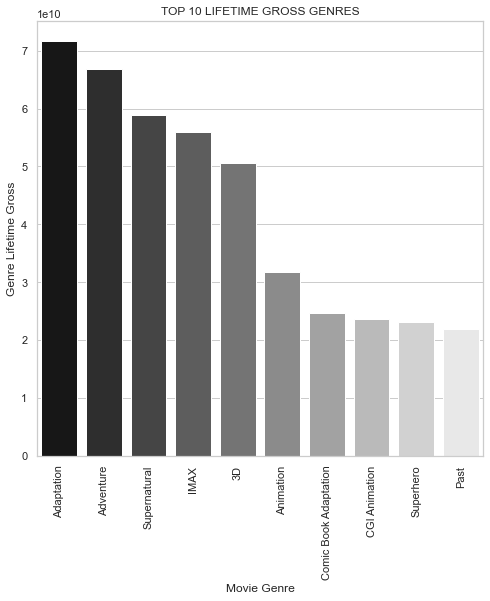

In [18]:
#MVP Initial analysis of genre success
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc ={'figure.figsize':(8,8)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = top_10_genre_gross['Genre_Type'], y= top_10_genre_gross['Genre_Totals'], data = top_10_genre_gross, palette = 'gray').set_title('TOP 10 LIFETIME GROSS GENRES')
plt.xticks(rotation = 90)
plt.ylabel("Genre Lifetime Gross")
plt.xlabel("Movie Genre")
plt.show()

In [19]:
#Pipeline Creation

#function for bringing in url as soup obj
def mojo_url(url):
    response= requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'lxml')
    
    return soup

In [20]:
#loop for lifetime gross URL
lifetime_gross_url=[]

for i in range(0,801,200):
    if i == 0:
        lifetime_gross_url.append('https://www.boxofficemojo.com/chart/top_lifetime_gross/')
    else:
        lifetime_gross_url.append('https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset={}'.format(i))

In [21]:
lifetime_gross_url

['https://www.boxofficemojo.com/chart/top_lifetime_gross/',
 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200',
 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=400',
 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=600',
 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=800']

In [22]:
#Acquire Titles from Each page
#page1
alltime_titles= []
url_pg1 = lifetime_gross_url[0]
soup_pg1 = mojo_url(url_pg1)
pg1_titles = soup_pg1.find_all(class_= 'a-text-left mojo-field-type-title')

for row in pg1_titles:
    alltime_titles.append(row.find('a').text)
alltime_titles

['Star Wars: Episode VII - The Force Awakens',
 'Avengers: Endgame',
 'Avatar',
 'Black Panther',
 'Avengers: Infinity War',
 'Titanic',
 'Jurassic World',
 'The Avengers',
 'Star Wars: Episode VIII - The Last Jedi',
 'Incredibles 2',
 'The Lion King',
 'The Dark Knight',
 'Rogue One: A Star Wars Story',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Beauty and the Beast',
 'Finding Dory',
 'Frozen II',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode IV - A New Hope',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'Shrek 2',
 'E.T. the Extra-Terrestrial',
 'Toy Story 4',
 'Captain Marvel',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lion King',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Spider-Man',
 'Jumanji: Welcome to the Jungle',
 'Jurassic Park',
 'Transformers: Revenge of the Fallen',
 'Frozen',
 'Spider-Man: Fa

In [23]:
#page2 titles
url_pg2 = lifetime_gross_url[1]
soup_pg2 = mojo_url(url_pg2)
pg2_titles = soup_pg2.find_all(class_= 'a-text-left mojo-field-type-title')

for row in pg2_titles:
    alltime_titles.append(row.find('a').text)
alltime_titles

['Star Wars: Episode VII - The Force Awakens',
 'Avengers: Endgame',
 'Avatar',
 'Black Panther',
 'Avengers: Infinity War',
 'Titanic',
 'Jurassic World',
 'The Avengers',
 'Star Wars: Episode VIII - The Last Jedi',
 'Incredibles 2',
 'The Lion King',
 'The Dark Knight',
 'Rogue One: A Star Wars Story',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Beauty and the Beast',
 'Finding Dory',
 'Frozen II',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode IV - A New Hope',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'Shrek 2',
 'E.T. the Extra-Terrestrial',
 'Toy Story 4',
 'Captain Marvel',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lion King',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Spider-Man',
 'Jumanji: Welcome to the Jungle',
 'Jurassic Park',
 'Transformers: Revenge of the Fallen',
 'Frozen',
 'Spider-Man: Fa

In [24]:
#page3 titles
url_pg3 = lifetime_gross_url[2]
soup_pg3 = mojo_url(url_pg3)
pg3_titles = soup_pg3.find_all(class_= 'a-text-left mojo-field-type-title')

for row in pg3_titles:
    alltime_titles.append(row.find('a').text)
alltime_titles

['Star Wars: Episode VII - The Force Awakens',
 'Avengers: Endgame',
 'Avatar',
 'Black Panther',
 'Avengers: Infinity War',
 'Titanic',
 'Jurassic World',
 'The Avengers',
 'Star Wars: Episode VIII - The Last Jedi',
 'Incredibles 2',
 'The Lion King',
 'The Dark Knight',
 'Rogue One: A Star Wars Story',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Beauty and the Beast',
 'Finding Dory',
 'Frozen II',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode IV - A New Hope',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'Shrek 2',
 'E.T. the Extra-Terrestrial',
 'Toy Story 4',
 'Captain Marvel',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lion King',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Spider-Man',
 'Jumanji: Welcome to the Jungle',
 'Jurassic Park',
 'Transformers: Revenge of the Fallen',
 'Frozen',
 'Spider-Man: Fa

In [25]:
#page4 titles
url_pg4 = lifetime_gross_url[3]
soup_pg4 = mojo_url(url_pg4)
pg4_titles = soup_pg4.find_all(class_= 'a-text-left mojo-field-type-title')

for row in pg4_titles:
    alltime_titles.append(row.find('a').text)
alltime_titles

['Star Wars: Episode VII - The Force Awakens',
 'Avengers: Endgame',
 'Avatar',
 'Black Panther',
 'Avengers: Infinity War',
 'Titanic',
 'Jurassic World',
 'The Avengers',
 'Star Wars: Episode VIII - The Last Jedi',
 'Incredibles 2',
 'The Lion King',
 'The Dark Knight',
 'Rogue One: A Star Wars Story',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Beauty and the Beast',
 'Finding Dory',
 'Frozen II',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode IV - A New Hope',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'Shrek 2',
 'E.T. the Extra-Terrestrial',
 'Toy Story 4',
 'Captain Marvel',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lion King',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Spider-Man',
 'Jumanji: Welcome to the Jungle',
 'Jurassic Park',
 'Transformers: Revenge of the Fallen',
 'Frozen',
 'Spider-Man: Fa

In [26]:
#page5 titles
url_pg5 = lifetime_gross_url[4]
soup_pg5 = mojo_url(url_pg5)
pg5_titles = soup_pg5.find_all(class_= 'a-text-left mojo-field-type-title')

for row in pg5_titles:
    alltime_titles.append(row.find('a').text)
alltime_titles

['Star Wars: Episode VII - The Force Awakens',
 'Avengers: Endgame',
 'Avatar',
 'Black Panther',
 'Avengers: Infinity War',
 'Titanic',
 'Jurassic World',
 'The Avengers',
 'Star Wars: Episode VIII - The Last Jedi',
 'Incredibles 2',
 'The Lion King',
 'The Dark Knight',
 'Rogue One: A Star Wars Story',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Beauty and the Beast',
 'Finding Dory',
 'Frozen II',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode IV - A New Hope',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'Shrek 2',
 'E.T. the Extra-Terrestrial',
 'Toy Story 4',
 'Captain Marvel',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lion King',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Spider-Man',
 'Jumanji: Welcome to the Jungle',
 'Jurassic Park',
 'Transformers: Revenge of the Fallen',
 'Frozen',
 'Spider-Man: Fa

In [27]:
#check all top 1000 movies are in
len(alltime_titles)

1000

In [28]:
#get all links from table; including duplicates

all_links = []
#pg 1 of table
movie_link_ref1 = soup_pg1.find(class_="a-section imdb-scroll-table-inner").find_all('a')

for row in movie_link_ref1:
    end_url = row.get("href")
    all_links.append('https://www.boxofficemojo.com' + end_url)
        
all_links        

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/year/2019/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/year/2009/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/year/1997/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/

In [29]:
movie_link_ref2 = soup_pg2.find(class_="a-section imdb-scroll-table-inner").find_all('a')

#pg2
for row in movie_link_ref2:
    end_url2 = row.get("href")
    all_links.append('https://www.boxofficemojo.com' + end_url2)
        
all_links        

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/year/2019/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/year/2009/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/year/1997/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/

In [30]:
movie_link_ref3 = soup_pg3.find(class_="a-section imdb-scroll-table-inner").find_all('a')

#pg3
for row in movie_link_ref3:
    end_url3 = row.get("href")
    all_links.append('https://www.boxofficemojo.com' + end_url3)
        
all_links

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/year/2019/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/year/2009/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/year/1997/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/

In [31]:
movie_link_ref4 = soup_pg4.find(class_="a-section imdb-scroll-table-inner").find_all('a')

#pg4
for row in movie_link_ref4:
    end_url4 = row.get("href")
    all_links.append('https://www.boxofficemojo.com' + end_url4)
        
all_links

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/year/2019/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/year/2009/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/year/1997/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/

In [32]:
movie_link_ref5 = soup_pg5.find(class_="a-section imdb-scroll-table-inner").find_all('a')

#pg5
for row in movie_link_ref5:
    end_url5 = row.get("href")
    all_links.append('https://www.boxofficemojo.com' + end_url5)
        
all_links

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/year/2019/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/year/2009/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/year/2018/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/year/1997/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/year/2015/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/

In [33]:
#get title links instead of year since year is not consistently linked
all_movie_links = []

for row in all_links:
    if 'title' in row:
        all_movie_links.append(row)
    else:
        pass
all_movie_links

['https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_cso_table_1',
 'https://www.boxofficemojo.com/title/tt4154796/?ref_=bo_cso_table_2',
 'https://www.boxofficemojo.com/title/tt0499549/?ref_=bo_cso_table_3',
 'https://www.boxofficemojo.com/title/tt1825683/?ref_=bo_cso_table_4',
 'https://www.boxofficemojo.com/title/tt4154756/?ref_=bo_cso_table_5',
 'https://www.boxofficemojo.com/title/tt0120338/?ref_=bo_cso_table_6',
 'https://www.boxofficemojo.com/title/tt0369610/?ref_=bo_cso_table_7',
 'https://www.boxofficemojo.com/title/tt0848228/?ref_=bo_cso_table_8',
 'https://www.boxofficemojo.com/title/tt2527336/?ref_=bo_cso_table_9',
 'https://www.boxofficemojo.com/title/tt3606756/?ref_=bo_cso_table_10',
 'https://www.boxofficemojo.com/title/tt6105098/?ref_=bo_cso_table_11',
 'https://www.boxofficemojo.com/title/tt0468569/?ref_=bo_cso_table_12',
 'https://www.boxofficemojo.com/title/tt3748528/?ref_=bo_cso_table_13',
 'https://www.boxofficemojo.com/title/tt2527338/?ref_=bo_cso_table_14',
 

In [34]:
#check that only 1000 movies are contained
len(all_movie_links)

1000

In [68]:
#Acquire lifetime gross from each page

#page1
ltgross_permovie =[] 
pg1_ltgross = soup_pg1.find_all(class_= 'a-text-right mojo-field-type-money')

for row in pg1_ltgross:
    money = money_to_int(row.text)
    ltgross_permovie.append(money)

#pg2
pg2_ltgross = soup_pg2.find_all(class_= 'a-text-right mojo-field-type-money')

for row in pg2_ltgross:
    money2 = money_to_int(row.text)
    ltgross_permovie.append(money2)
#pg3
pg3_ltgross = soup_pg3.find_all(class_= 'a-text-right mojo-field-type-money')

for row in pg3_ltgross:
    money3 = money_to_int(row.text)
    ltgross_permovie.append(money3)
#pg4
pg4_ltgross = soup_pg4.find_all(class_= 'a-text-right mojo-field-type-money')

for row in pg4_ltgross:
    money4 = money_to_int(row.text)
    ltgross_permovie.append(money4)
#pg5
pg5_ltgross = soup_pg5.find_all(class_= 'a-text-right mojo-field-type-money')

for row in pg5_ltgross:
    money5 = money_to_int(row.text)
    ltgross_permovie.append(money5)

len(ltgross_permovie)

1000

In [81]:
#get year released
year_released = []

#pg1
pg1_year = soup_pg1.find_all(class_ = 'a-text-left mojo-field-type-year')

for row in pg1_year:
    year_released.append(row.text)
#pg2
pg2_year = soup_pg2.find_all(class_ = 'a-text-left mojo-field-type-year')

for row in pg2_year:
    year_released.append(row.text)

#pg3
pg3_year = soup_pg3.find_all(class_ = 'a-text-left mojo-field-type-year')

for row in pg3_year:
    year_released.append(row.text)
    
#pg4
pg4_year = soup_pg4.find_all(class_ = 'a-text-left mojo-field-type-year')

for row in pg4_year:
    year_released.append(row.text)
    
#pg5
pg5_year = soup_pg5.find_all(class_ = 'a-text-left mojo-field-type-year')

for row in pg5_year:
    year_released.append(row.text)
    

len(year_released)

1000

In [3]:
year_released_int = []

for row in year_released:
    year_released_int.append(int(row))

len(year_released_int)

NameError: name 'year_released' is not defined

In [108]:
#get movie runningtime
runningtime = []
for movie_row in all_movie_links:
    movie_soup = mojo_url(movie_row)
    rt_string = movie_soup.find(text='Running Time')
    rt_string.findNext()
    rt = rt_string.findNext().text
    runningtime.append(rt)

runningtime

['2 hr 18 min',
 '3 hr 1 min',
 '2 hr 42 min',
 '2 hr 14 min',
 '2 hr 29 min',
 '3 hr 14 min',
 '2 hr 4 min',
 '2 hr 23 min',
 '2 hr 32 min',
 '1 hr 58 min',
 '1 hr 58 min',
 '2 hr 32 min',
 '2 hr 13 min',
 '2 hr 21 min',
 '2 hr 9 min',
 '1 hr 37 min',
 '1 hr 43 min',
 '2 hr 16 min',
 '2 hr 1 min',
 '2 hr 21 min',
 '2 hr 44 min',
 '1 hr 33 min',
 '1 hr 55 min',
 '1 hr 40 min',
 '2 hr 3 min',
 '2 hr 26 min',
 '2 hr 31 min',
 '1 hr 28 min',
 '2 hr 8 min',
 '1 hr 43 min',
 '2 hr 21 min',
 '2 hr 10 min',
 '2 hr 27 min',
 '2 hr 22 min',
 '2 hr 1 min',
 '1 hr 59 min',
 '2 hr 7 min',
 '2 hr 29 min',
 '1 hr 42 min',
 '2 hr 9 min',
 '2 hr 16 min',
 '2 hr 10 min',
 '1 hr 40 min',
 '2 hr 20 min',
 '3 hr 21 min',
 '2 hr 7 min',
 '2 hr 7 min',
 '1 hr 27 min',
 '1 hr 38 min',
 '1 hr 46 min',
 '1 hr 48 min',
 '1 hr 35 min',
 '2 hr 8 min',
 '2 hr 17 min',
 '2 hr 34 min',
 '2 hr 13 min',
 '2 hr 59 min',
 '1 hr 48 min',
 '2 hr 3 min',
 '2 hr 19 min',
 '1 hr 31 min',
 '2 hr 2 min',
 '2 hr 23 min',
 '2 hr

In [312]:
runningtime

['2 hr 18 min',
 '3 hr 1 min',
 '2 hr 42 min',
 '2 hr 14 min',
 '2 hr 29 min',
 '3 hr 14 min',
 '2 hr 4 min',
 '2 hr 23 min',
 '2 hr 32 min',
 '1 hr 58 min',
 '1 hr 58 min',
 '2 hr 32 min',
 '2 hr 13 min',
 '2 hr 21 min',
 '2 hr 9 min',
 '1 hr 37 min',
 '1 hr 43 min',
 '2 hr 16 min',
 '2 hr 1 min',
 '2 hr 21 min',
 '2 hr 44 min',
 '1 hr 33 min',
 '1 hr 55 min',
 '1 hr 40 min',
 '2 hr 3 min',
 '2 hr 26 min',
 '2 hr 31 min',
 '1 hr 28 min',
 '2 hr 8 min',
 '1 hr 43 min',
 '2 hr 21 min',
 '2 hr 10 min',
 '2 hr 27 min',
 '2 hr 22 min',
 '2 hr 1 min',
 '1 hr 59 min',
 '2 hr 7 min',
 '2 hr 29 min',
 '1 hr 42 min',
 '2 hr 9 min',
 '2 hr 16 min',
 '2 hr 10 min',
 '1 hr 40 min',
 '2 hr 20 min',
 '3 hr 21 min',
 '2 hr 7 min',
 '2 hr 7 min',
 '1 hr 27 min',
 '1 hr 38 min',
 '1 hr 46 min',
 '1 hr 48 min',
 '1 hr 35 min',
 '2 hr 8 min',
 '2 hr 17 min',
 '2 hr 34 min',
 '2 hr 13 min',
 '2 hr 59 min',
 '1 hr 48 min',
 '2 hr 3 min',
 '2 hr 19 min',
 '1 hr 31 min',
 '2 hr 2 min',
 '2 hr 23 min',
 '2 hr

In [353]:
def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return 115

runningtime_minutes = []
    
for t in runningtime:
    minutes_update = runtime_to_minutes(t)
    runningtime_minutes.append(minutes_update)

runningtime_minutes

[138,
 181,
 162,
 134,
 149,
 194,
 124,
 143,
 152,
 118,
 118,
 152,
 133,
 141,
 129,
 97,
 103,
 136,
 121,
 141,
 164,
 93,
 115,
 100,
 123,
 146,
 151,
 88,
 128,
 103,
 141,
 130,
 147,
 142,
 121,
 119,
 127,
 149,
 102,
 129,
 136,
 130,
 100,
 140,
 201,
 127,
 127,
 87,
 98,
 106,
 108,
 95,
 128,
 137,
 154,
 133,
 179,
 108,
 123,
 139,
 91,
 122,
 143,
 133,
 108,
 121,
 142,
 152,
 135,
 123,
 119,
 93,
 123,
 144,
 126,
 152,
 122,
 178,
 130,
 124,
 142,
 169,
 131,
 145,
 143,
 143,
 169,
 153,
 124,
 130,
 146,
 107,
 96,
 124,
 148,
 138,
 115,
 143,
 143,
 92,
 157,
 103,
 137,
 138,
 117,
 115,
 100,
 91,
 85,
 108,
 104,
 90,
 89,
 161,
 136,
 115,
 124,
 104,
 136,
 161,
 100,
 127,
 101,
 129,
 144,
 102,
 95,
 126,
 108,
 98,
 142,
 107,
 115,
 92,
 165,
 117,
 105,
 101,
 113,
 95,
 97,
 137,
 93,
 130,
 93,
 130,
 105,
 104,
 116,
 132,
 132,
 143,
 122,
 115,
 129,
 115,
 132,
 144,
 106,
 92,
 115,
 137,
 90,
 136,
 98,
 81,
 102,
 147,
 124,
 88,
 125,


In [398]:
#get movie Genre
genres = []
for genre_row in all_movie_links:
    genre_soup = mojo_url(genre_row)
    genre_string = genre_soup.find(text='Genres')
    genre_string.findNext()
    g = genre_string.findNext().text
    genres.append(g)

genres

['Action\n    \n        Adventure\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Drama\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Fantasy\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Sci-Fi',
 'Drama\n    \n        Romance',
 'Action\n    \n        Adventure\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Fantasy\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Animation\n    \n        Comedy\n    \n        Family\n    \n        Sci-Fi',
 'Adventure\n    \n        Animation\n    \n        Drama\n    \n        Family\n    \n        Musical',
 'Action\n    \n        Crime\n    \n        Drama\n    \n        Thriller',
 'Action\n    \n        Adventure\n    \n        Sci-Fi',
 'Action\n    \n        Adventure\n    \n        Fantasy\n    \n     

In [407]:
len(genres)

1000

In [369]:
genre_categories = {}

for row in genres:
    cats = row.split()
    for i in cats:
        if i not in genre_categories:
            genre_categories[i] = 1
        else:
            genre_categories[i] += 1

genre_categories

{'Action': 401,
 'Adventure': 445,
 'Sci-Fi': 225,
 'Drama': 342,
 'Fantasy': 232,
 'Romance': 170,
 'Animation': 148,
 'Comedy': 440,
 'Family': 243,
 'Musical': 59,
 'Crime': 146,
 'Thriller': 240,
 'Mystery': 90,
 'War': 31,
 'Biography': 43,
 'Horror': 51,
 'Music': 31,
 'Sport': 38,
 'History': 23,
 'Western': 16,
 'Documentary': 4,
 'Short': 1}

In [421]:
Action = []
Adventure = []
Sci_Fi = []
Drama = []
Fantasy = []
Romance = []
Animation = []
Comedy = []
Family = []
Musical = []
Crime = []
Thriller = []
Mystery = []
War = []
Biography = []
Horror = []
Music = []
Sport = []
History = []
Western = []
Documentary = []
Short = []

for r in genres:
    Action.append(r.count('Action'))
    Adventure.append(r.count('Adventure'))
    Sci_Fi.append(r.count('Sci-Fi'))
    Drama.append(r.count('Drama'))
    Fantasy.append(r.count('Fantasy'))
    Romance.append(r.count('Romance'))
    Animation.append(r.count('Animation'))
    Comedy.append(r.count('Comedy'))
    Family.append(r.count('Family'))
    Musical.append(r.count('Musical'))
    Crime.append(r.count('Crime'))
    Thriller.append(r.count('Thriller'))
    Mystery.append(r.count('Mystery'))
    War.append(r.count('War'))
    Biography.append(r.count('Biography'))
    Horror.append(r.count('Horror'))
    Music.append(r.count('Music'))
    Sport.append(r.count('Sport'))
    History.append(r.count('History'))
    Western.append(r.count('Western'))
    Documentary.append(r.count('Documentary'))
    Short.append(r.count('Short'))


In [426]:
len(Sci_Fi)

1000

In [368]:
genre_cat_df = pd.DataFrame(genre_categories, index = range(22)
genre_cat_df

,Action,Adventure,Sci-Fi,Drama,Fantasy,Romance,Animation,Comedy,Family,Musical,...,Mystery,War,Biography,Horror,Music,Sport,History,Western,Documentary,Short
0,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
1,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
2,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
3,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
4,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
5,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
6,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
7,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
8,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1
9,401,445,225,342,232,170,148,440,243,59,...,90,31,43,51,31,38,23,16,4,1


In [129]:
#get MPAA rating
mpaa = []
for mpaa_row in all_movie_links:
    test_mpaa_soup = mojo_url(mpaa_row)
    if test_mpaa_soup.find(text='MPAA'):
        mpaa_string = test_mpaa_soup.find(text='MPAA') 
        mpaa_string.findNext()
        m = mpaa_string.findNext().text
        mpaa.append(m)
    else:
        mpaa.append(0)
mpaa

['PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG',
 'PG',
 'PG',
 'PG',
 'PG-13',
 'PG-13',
 'PG',
 'PG',
 'G',
 'PG-13',
 'PG-13',
 'PG-13',
 'G',
 'PG-13',
 0,
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 0,
 'PG-13',
 'PG-13',
 'PG-13',
 'R',
 'PG',
 'PG',
 'PG',
 'R',
 'PG',
 'PG',
 'PG-13',
 'PG-13',
 'R',
 'PG-13',
 'PG',
 'PG-13',
 'PG-13',
 'PG',
 'R',
 'PG-13',
 'PG-13',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'R',
 'PG-13',
 'R',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG-13',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG',
 'PG-13',
 'PG-13',
 'PG-13',
 'PG',
 'PG-13',
 'G',
 'PG-13',
 0,
 'PG-13',
 'R',
 'PG-13',
 'PG-13',
 'R',
 'PG-13',
 'PG',
 'PG',
 'G',
 'PG',
 'PG',
 'PG',
 'PG-13',
 0,
 0,
 

In [130]:
len(mpaa)

1000

In [263]:
#turn categorical data into numerical 
mpaa_fixed = []

for row in mpaa:
    if row == 'Approved':
        mpaa_fixed.append(1.0)
    elif row == 'G':
        mpaa_fixed.append(1.0)
    elif row == 'PG':
        mpaa_fixed.append(2.0)
    elif row == 'PG-13':
        mpaa_fixed.append(3.0)
    elif row == 'R':
        mpaa_fixed.append(4.0)
    else:
        mpaa_fixed.append(2.94)

len(mpaa_fixed)

1000

In [133]:
#get Budget
budget = []

for budget_row in all_movie_links:
    budget_soup = mojo_url(budget_row)
    if budget_soup.find(text='Budget'):
        budget_string = budget_soup.find(text='Budget')
        budget_string.findNext()
        b = budget_string.findNext().text
        budget.append(b)
    else:
        budget.append(0)

budget

['$245,000,000',
 '$356,000,000',
 '$237,000,000',
 0,
 0,
 '$200,000,000',
 '$150,000,000',
 '$220,000,000',
 '$317,000,000',
 0,
 '$260,000,000',
 '$185,000,000',
 '$200,000,000',
 '$275,000,000',
 '$160,000,000',
 0,
 '$150,000,000',
 '$115,000,000',
 '$11,000,000',
 '$250,000,000',
 '$250,000,000',
 '$150,000,000',
 '$10,500,000',
 '$200,000,000',
 '$160,000,000',
 '$130,000,000',
 '$225,000,000',
 '$45,000,000',
 '$170,000,000',
 '$200,000,000',
 '$149,000,000',
 '$200,000,000',
 '$250,000,000',
 '$78,000,000',
 '$139,000,000',
 '$90,000,000',
 '$63,000,000',
 '$200,000,000',
 '$150,000,000',
 '$160,000,000',
 '$200,000,000',
 0,
 '$94,000,000',
 '$113,000,000',
 '$94,000,000',
 '$200,000,000',
 '$30,000,000',
 '$75,000,000',
 '$76,000,000',
 '$175,000,000',
 '$58,000,000',
 '$175,000,000',
 '$183,000,000',
 '$190,000,000',
 '$195,000,000',
 '$58,800,000',
 '$94,000,000',
 0,
 '$125,000,000',
 '$258,000,000',
 '$74,000,000',
 '$55,000,000',
 0,
 '$175,000,000',
 '$200,000,000',
 '

In [256]:
budget_int_list = []
for row in budget:
    if type(row) != int:
        budget_int = money_to_int(row)
        budget_int_list.append(budget_int)
    elif row == 0:
        budget_int_list.append(88342356)
    else:
        budget_int_list.append(row)

len(budget_int_list)

1000

In [175]:
#get Domestic Opening
domestic_opening = []

for do_row in all_movie_links:
    dopening_soup = mojo_url(do_row)
    if dopening_soup.find(text='Domestic Opening'):
        dopening_string = dopening_soup.find(text='Domestic Opening') 
        dopening_string.findNext()
        do = dopening_string.findNext().text
        domestic_opening.append(do)
    else:
        domestic_opening.append(0)

domestic_opening

['$247,966,675',
 '$357,115,007',
 '$77,025,481',
 '$202,003,951',
 '$257,698,183',
 '$28,638,131',
 '$208,806,270',
 '$207,438,708',
 '$220,009,584',
 '$182,687,905',
 '$191,770,759',
 '$158,411,483',
 '$155,081,681',
 '$177,383,864',
 '$174,750,616',
 '$135,060,273',
 '$130,263,358',
 '$64,820,970',
 '$1,554,475',
 '$191,271,109',
 '$160,887,295',
 '$108,037,878',
 '$11,835,389',
 '$120,908,065',
 '$153,433,423',
 '$158,074,286',
 '$135,634,554',
 '$1,586,753',
 '$148,024,610',
 '$110,307,189',
 '$103,251,471',
 '$174,144,585',
 '$179,139,142',
 '$152,535,747',
 '$114,844,116',
 '$36,169,328',
 '$47,026,828',
 '$108,966,307',
 '$243,390',
 '$92,579,212',
 '$146,510,104',
 '$169,189,427',
 '$70,251,710',
 '$108,435,841',
 '$72,629,713',
 '$88,156,227',
 '$83,848,082',
 '$104,352,905',
 '$83,517,315',
 '$103,261,464',
 '$132,434,639',
 '$90,440,272',
 '$91,500,929',
 '$147,187,040',
 '$97,852,865',
 '$633,456',
 '$62,007,528',
 '$75,063,401',
 '$121,897,634',
 '$151,116,516',
 '$115,71

In [176]:
len(domestic_opening)

1000

In [244]:
domesticopening_int_list = []

for row in domestic_opening:
    if type(row) != int:
        domesticopening_int = money_to_int(row)
        domesticopening_int_list.append(domesticopening_int)
    elif row == 0:
        domesticopening_int_list.append(39878544.987)
    else:
        domesticopening_int_list.append(row)

len(domesticopening_int_list)

1000

In [135]:
#get Domestic Distributor
distributor = []

for dist_row in all_movie_links:
    dist_soup = mojo_url(dist_row)
    if dist_soup.find(text='Domestic Distributor'):
        dist_string = dist_soup.find(text='Domestic Distributor') 
        dist_string.findNext()
        dist = dist_string.findNext().text
        distributor.append(dist)
    else:
        distributor.append('None Given')

distributor

['Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Twentieth Century FoxSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Paramount PicturesSee full company information\n\n',
 'Universal PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Warner Bros.See full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company information\n\n',
 'Walt Disney Studios Motion PicturesSee full company informati

In [136]:
len(distributor)

1000

In [280]:
distributor_fixed = []

for row in distributor:
    if 'See full company information\n\n' in row:
        new = row.replace('See full company information\n\n', '')
        distributor_fixed.append(new)
    else:
        distributor_fixed.append(row)

distributor_fixed

['Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Twentieth Century Fox',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Paramount Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Twentieth Century Fox',
 'Twentieth Century Fox',
 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'DreamWorks Distribution',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Lionsgate',
 'Walt Disney Studios Motion Pictures',
 'Walt Disney Studios Motion Pictures',
 'Universal Pictures',
 'Walt Disney Studios Motion Pictu

In [137]:
#get Earliest Release Date - to extract month
early_release = []

for early_row in all_movie_links:
    early_soup = mojo_url(early_row)
    if early_soup.find(text='Earliest Release Date'):
        early_string = early_soup.find(text='Earliest Release Date') 
        early_string.findNext()
        early = early_string.findNext().text
        early_release.append(early)
    else:
        early_release.append('None Given')

early_release

['December 16, 2015\n            (APAC, EMEA)',
 'April 24, 2019\n            (21 markets)',
 'December 16, 2009\n            (LATAM, EMEA)',
 'February 13, 2018\n            (EMEA, APAC)',
 'April 25, 2018\n            (EMEA, APAC)',
 'December 19, 1997\n            (Domestic)',
 'June 10, 2015\n            (9 markets)',
 'April 25, 2012\n            (APAC, EMEA)',
 'December 13, 2017\n            (EMEA, APAC)',
 'June 14, 2018\n            (16 markets)',
 'July 11, 2019\n            (Australia)',
 'July 16, 2008\n            (APAC)',
 'December 14, 2016\n            (EMEA)',
 'December 18, 2019\n            (13 markets)',
 'March 16, 2017\n            (24 markets)',
 'June 15, 2016\n            (Philippines)',
 'November 20, 2019\n            (EMEA, APAC)',
 'May 19, 1999\n            (Domestic)',
 'May 25, 1977\n            (Domestic)',
 'April 22, 2015\n            (EMEA, APAC)',
 'July 19, 2012\n            (EMEA, APAC)',
 'May 19, 2004\n            (Domestic)',
 'June 11, 1982\n 

In [298]:
early_release[:4]

['December 16, 2015\n            (APAC, EMEA)',
 'April 24, 2019\n            (21 markets)',
 'December 16, 2009\n            (LATAM, EMEA)',
 'February 13, 2018\n            (EMEA, APAC)']

In [307]:
early_release_int = []

for month in early_release:
    m_split = month.split()
    month_string = m_split[0]
    if month_string == 'January':
        early_release_int.append(1)
    elif month_string == 'February':
        early_release_int.append(2)
    elif month_string == 'March':
        early_release_int.append(3)
    elif month_string == 'April':
        early_release_int.append(4)
    elif month_string == 'May':
        early_release_int.append(5)
    elif month_string == 'June':
        early_release_int.append(6)
    elif month_string == 'July':
        early_release_int.append(7)
    elif month_string == 'August':
        early_release_int.append(8)
    elif month_string == 'September':
        early_release_int.append(9)
    elif month_string == 'October':
        early_release_int.append(10)
    elif month_string == 'November':
        early_release_int.append(11)
    elif month_string == 'December':
        early_release_int.append(12)
    else:
        Break
        
len(early_release_int)

1000

In [155]:
#get International Gross
international_gross = []

for international_row in all_movie_links:
    international_soup = mojo_url(international_row)
    if international_soup.find(class_='mojo-performance-summary-table').find_all('span', class_='money')[1].text:
        international_string =international_soup.find(class_='mojo-performance-summary-table').find_all('span', class_='money')[1].text
        international_gross.append(international_string)
    else:
        international_gross.append(0)

international_gross

['$1,132,859,475',
 '$1,939,128,328',
 '$2,086,738,578',
 '$647,171,407',
 '$1,369,544,272',
 '$1,542,283,320',
 '$1,018,130,819',
 '$895,457,605',
 '$712,517,448',
 '$636,057,783',
 '$1,123,997,284',
 '$471,115,201',
 '$523,880,396',
 '$563,030,047',
 '$759,953,360',
 '$542,275,381',
 '$972,653,355',
 '$552,538,030',
 '$195,751,992',
 '$943,803,672',
 '$633,003,513',
 '$487,534,523',
 '$304,203,888',
 '$639,356,585',
 '$701,633,133',
 '$440,343,699',
 '$642,863,935',
 '$640,828,028',
 '$892,746,536',
 '$651,965,931',
 '$410,009,114',
 '$805,797,258',
 '$745,253,147',
 '$286,384,032',
 '$418,002,176',
 '$558,002,774',
 '$629,713,583',
 '$434,191,823',
 '$880,555,091',
 '$741,395,911',
 '$473,942,950',
 '$960,912,354',
 '$559,509,384',
 '$488,119,983',
 '$768,185,007',
 '$415,390,628',
 '$241,271,576',
 '$507,074,301',
 '$602,700,620',
 '$602,553,806',
 '$419,766,082',
 '$501,926,308',
 '$695,134,737',
 '$1,162,334,379',
 '$771,403,536',
 '$197,300,000',
 '$604,943,730',
 '$682,852,856'

In [156]:
len(international_gross)

1000

In [168]:
internationalgross_int_list = []

for row in international_gross:
    if type(row) != int:
        internationalgross_int = money_to_int(row)
        internationalgross_int_list.append(internationalgross_int)
    else:
        internationalgross_int_list.append(row)

len(internationalgross_int_list)

1000

In [ ]:
Action = []
Adventure = []
Sci_Fi = []
Drama = []
Fantasy = []
Romance = []
Animation = []
Comedy = []
Family = []
Musical = []
Crime = []
Thriller = []
Mystery = []
War = []
Biography = []
Horror = []
Music = []
Sport = []
History = []
Western = []
Documentary = []
Short = []

In [439]:
#pd DF with all data combined
top_1000_alltime = pd.DataFrame({'Title':alltime_titles,'Link':all_movie_links,'Lifetime Gross- Domestic':ltgross_permovie,'Year Released':year_released_int,'Running Time':runningtime_minutes,'Rating': mpaa_fixed,'Domestic Opening Gross': domesticopening_int_list,'Budget':budget_int_list, 'Domestic Distributor': distributor_fixed, 'Earliest Release Month': early_release_int, 'International Gross': internationalgross_int_list, 'Action': Action, 'Adventure':Adventure, 'Sci_Fi':Sci_Fi,'Drama':Drama,'Fantasy':Fantasy,'Romance':Romance,'Animation':Animation,'Comedy':Comedy,'Family':Family,'Musical':Musical,'Crime':Crime,'Thriller':Thriller,'Mystery':Mystery,'War':War,'Biography':Biography,'Horror':Horror,'Music':Music,'Sport':Sport,'History':History,'Western':Western,'Documentary':Documentary,'Short':Short})
top_1000_alltime.index = top_1000_alltime.index + 1
top_1000_alltime.index.name = 'Rank'
top_1000_alltime.head(10)

,Title,Link,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Domestic Opening Gross,Budget,Domestic Distributor,Earliest Release Month,...,Mystery,War,Biography,Horror,Music,Sport,History,Western,Documentary,Short
Rank,,,,,,,,,,,,,,,,,,,,,
1,Star Wars: Episode VII - The Force Awakens,https://www.boxofficemojo.com/title/tt2488496/...,936662225,2015,138,3.0,247966675.0,245000000,Walt Disney Studios Motion Pictures,12,...,0,0,0,0,0,0,0,0,0,0
2,Avengers: Endgame,https://www.boxofficemojo.com/title/tt4154796/...,858373000,2019,181,3.0,357115007.0,356000000,Walt Disney Studios Motion Pictures,4,...,0,0,0,0,0,0,0,0,0,0
3,Avatar,https://www.boxofficemojo.com/title/tt0499549/...,760507625,2009,162,3.0,77025481.0,237000000,Twentieth Century Fox,12,...,0,0,0,0,0,0,0,0,0,0
4,Black Panther,https://www.boxofficemojo.com/title/tt1825683/...,700426566,2018,134,3.0,202003951.0,88342356,Walt Disney Studios Motion Pictures,2,...,0,0,0,0,0,0,0,0,0,0
5,Avengers: Infinity War,https://www.boxofficemojo.com/title/tt4154756/...,678815482,2018,149,3.0,257698183.0,88342356,Walt Disney Studios Motion Pictures,4,...,0,0,0,0,0,0,0,0,0,0
6,Titanic,https://www.boxofficemojo.com/title/tt0120338/...,659363944,1997,194,3.0,28638131.0,200000000,Paramount Pictures,12,...,0,0,0,0,0,0,0,0,0,0
7,Jurassic World,https://www.boxofficemojo.com/title/tt0369610/...,652385625,2015,124,3.0,208806270.0,150000000,Universal Pictures,6,...,0,0,0,0,0,0,0,0,0,0
8,The Avengers,https://www.boxofficemojo.com/title/tt0848228/...,623357910,2012,143,3.0,207438708.0,220000000,Walt Disney Studios Motion Pictures,4,...,0,0,0,0,0,0,0,0,0,0
9,Star Wars: Episode VIII - The Last Jedi,https://www.boxofficemojo.com/title/tt2527336/...,620181382,2017,152,3.0,220009584.0,317000000,Walt Disney Studios Motion Pictures,12,...,0,0,0,0,0,0,0,0,0,0


In [440]:
top_1000_alltime.to_csv('top_1000_alltime.csv')

In [441]:
top_1000_alltime.describe()

,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Domestic Opening Gross,Budget,Earliest Release Month,International Gross,Action,Adventure,...,Mystery,War,Biography,Horror,Music,Sport,History,Western,Documentary,Short
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.623179e+08,2004.340000,115.744000,2.943380,4.111478e+07,8.834236e+07,7.344000,2.165154e+08,0.402000,0.445000,...,0.091000,0.031000,0.043000,0.051000,0.092000,0.038000,0.023000,0.016000,0.004000,0.001000
std,1.000574e+08,12.163649,21.143593,0.732658,3.574540e+07,5.533500e+07,3.255805,2.117394e+08,0.490547,0.497214,...,0.287753,0.173404,0.202959,0.220108,0.318807,0.191292,0.149978,0.125538,0.063151,0.031623
min,8.017213e+07,1937.000000,70.000000,1.000000,1.446600e+04,1.500000e+04,1.000000,2.600000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.005444e+08,1999.000000,100.000000,2.940000,2.138011e+07,4.675000e+07,5.000000,8.508102e+07,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.279380e+08,2007.000000,115.000000,3.000000,3.348061e+07,8.834236e+07,7.000000,1.484686e+08,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.835802e+08,2013.000000,129.000000,3.000000,5.020974e+07,1.100000e+08,11.000000,2.710660e+08,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.366622e+08,2021.000000,238.000000,4.000000,3.571150e+08,3.560000e+08,12.000000,2.086739e+09,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [443]:
top_1000_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Title                     1000 non-null   object 
 1   Link                      1000 non-null   object 
 2   Lifetime Gross- Domestic  1000 non-null   int64  
 3   Year Released             1000 non-null   int64  
 4   Running Time              1000 non-null   int64  
 5   Rating                    1000 non-null   float64
 6   Domestic Opening Gross    1000 non-null   float64
 7   Budget                    1000 non-null   int64  
 8   Domestic Distributor      1000 non-null   object 
 9   Earliest Release Month    1000 non-null   int64  
 10  International Gross       1000 non-null   int64  
 11  Action                    1000 non-null   int64  
 12  Adventure                 1000 non-null   int64  
 13  Sci_Fi                    1000 non-null   int64  
 14  Drama   

In [295]:
distr_dummies = pd.get_dummies(top_1000_alltime['Domestic Distributor'])

distr_dummies.tail()

,20th Century Studios,AVCO Embassy Pictures,American International Pictures (AIP),Artisan Entertainment,Columbia Pictures,Dimension Films,DreamWorks,DreamWorks Distribution,FilmDistrict,Focus Features,...,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,USA Films,United Artists,United Artists Releasing,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
Rank,,,,,,,,,,,,,,,,,,,,,
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [445]:
full_top_1000_df = pd.merge(top_1000_alltime, distr_dummies, how = 'outer', on= 'Rank')
full_top_1000_df

,Title,Link,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Domestic Opening Gross,Budget,Domestic Distributor,Earliest Release Month,...,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,USA Films,United Artists,United Artists Releasing,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
Rank,,,,,,,,,,,,,,,,,,,,,
1,Star Wars: Episode VII - The Force Awakens,https://www.boxofficemojo.com/title/tt2488496/...,936662225,2015,138,3.0,247966675.0,245000000,Walt Disney Studios Motion Pictures,12,...,0,0,0,0,0,0,0,0,1,0
2,Avengers: Endgame,https://www.boxofficemojo.com/title/tt4154796/...,858373000,2019,181,3.0,357115007.0,356000000,Walt Disney Studios Motion Pictures,4,...,0,0,0,0,0,0,0,0,1,0
3,Avatar,https://www.boxofficemojo.com/title/tt0499549/...,760507625,2009,162,3.0,77025481.0,237000000,Twentieth Century Fox,12,...,0,0,0,1,0,0,0,0,0,0
4,Black Panther,https://www.boxofficemojo.com/title/tt1825683/...,700426566,2018,134,3.0,202003951.0,88342356,Walt Disney Studios Motion Pictures,2,...,0,0,0,0,0,0,0,0,1,0
5,Avengers: Infinity War,https://www.boxofficemojo.com/title/tt4154756/...,678815482,2018,149,3.0,257698183.0,88342356,Walt Disney Studios Motion Pictures,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Saw III,https://www.boxofficemojo.com/title/tt0489270/...,80238724,2006,108,4.0,33610391.0,10000000,Lionsgate,10,...,0,0,0,0,0,0,0,0,0,0
997,The Mummy,https://www.boxofficemojo.com/title/tt2345759/...,80227895,2017,111,3.0,31688375.0,125000000,Universal Pictures,6,...,0,0,0,0,0,0,0,1,0,0
998,Disturbia,https://www.boxofficemojo.com/title/tt0486822/...,80209692,2007,105,3.0,22224982.0,20000000,DreamWorks,4,...,0,0,0,0,0,0,0,0,0,0


In [470]:
full_top_1000_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Title                                  1000 non-null   object 
 1   Link                                   1000 non-null   object 
 2   Lifetime Gross- Domestic               1000 non-null   int64  
 3   Year Released                          1000 non-null   int64  
 4   Running Time                           1000 non-null   int64  
 5   Rating                                 1000 non-null   float64
 6   Domestic Opening Gross                 1000 non-null   float64
 7   Budget                                 1000 non-null   int64  
 8   Domestic Distributor                   1000 non-null   object 
 9   Earliest Release Month                 1000 non-null   int64  
 10  International Gross                    1000 non-null   int64  
 11  Acti

In [480]:
full_top_1000_df.to_csv('full_top_1000_df.csv')

In [481]:
full_top_1000_df.sample()

,Title,Link,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Domestic Opening Gross,Budget,Domestic Distributor,Earliest Release Month,...,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,USA Films,United Artists,United Artists Releasing,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
Rank,,,,,,,,,,,,,,,,,,,,,
929,Cliffhanger,https://www.boxofficemojo.com/title/tt0106582/...,84049211,1993,113,4.0,16176967.0,70000000,TriStar Pictures,5,...,0,0,1,0,0,0,0,0,0,0


In [455]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline


sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [456]:
#initial correlation view
full_top_1000_df.corr()

,Lifetime Gross- Domestic,Year Released,Running Time,Rating,Domestic Opening Gross,Budget,Earliest Release Month,International Gross,Action,Adventure,...,Summit Entertainment,The Weinstein Company,TriStar Pictures,Twentieth Century Fox,USA Films,United Artists,United Artists Releasing,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.
Lifetime Gross- Domestic,1.000000,0.187549,0.273793,-0.125254,0.786972,0.441011,-0.027356,0.799089,0.212203,0.352164,...,0.049957,-0.027438,-0.046891,-0.019853,-0.012086,-0.042276,-0.019486,-0.014144,0.222631,-0.006824
Year Released,0.187549,1.000000,0.033208,0.084208,0.352049,0.266101,-0.088339,0.314850,0.147012,0.224383,...,0.030670,0.046821,-0.057472,0.006310,-0.011294,-0.128918,0.038151,0.033355,0.001294,0.071748
Running Time,0.273793,0.033208,1.000000,0.312563,0.218117,0.261395,0.139319,0.317507,0.233933,-0.030286,...,0.016960,0.067116,-0.011268,-0.035699,0.046794,-0.010088,-0.044530,0.007332,-0.093026,0.122278
Rating,-0.125254,0.084208,0.312563,1.000000,-0.080369,-0.198836,0.004136,-0.119985,0.122105,-0.421638,...,0.005481,0.076738,0.055677,-0.074793,0.045651,-0.015919,-0.040759,0.086766,-0.318606,0.149076
Domestic Opening Gross,0.786972,0.352049,0.218117,-0.080369,1.000000,0.549062,-0.192736,0.715167,0.298927,0.372360,...,0.091912,-0.055306,-0.064671,-0.032545,-0.036246,-0.038813,-0.009577,0.015187,0.189023,0.036306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Artists,-0.042276,-0.128918,-0.010088,-0.015919,-0.038813,-0.023105,0.047495,-0.061667,-0.063701,-0.069569,...,-0.005508,-0.006036,-0.008562,-0.030033,-0.002458,1.000000,-0.002458,-0.029767,-0.034912,-0.034662
United Artists Releasing,-0.019486,0.038151,-0.044530,-0.040759,-0.009577,-0.036807,0.025823,-0.016961,-0.025941,0.035333,...,-0.002243,-0.002458,-0.003487,-0.012230,-0.001001,-0.002458,1.000000,-0.012122,-0.014217,-0.014115
Universal Pictures,-0.014144,0.033355,0.007332,0.086766,0.015187,-0.080712,-0.061656,-0.004652,-0.033308,-0.078058,...,-0.027159,-0.029767,-0.042224,-0.148101,-0.012122,-0.029767,-0.012122,1.000000,-0.172163,-0.170930
Walt Disney Studios Motion Pictures,0.222631,0.001294,-0.093026,-0.318606,0.189023,0.227506,0.007568,0.170833,-0.057477,0.216578,...,-0.031854,-0.034912,-0.049523,-0.173702,-0.014217,-0.034912,-0.014217,-0.172163,1.000000,-0.200477


In [466]:
#cleaning genre -- extracting top genres to remove excess features

print(full_top_1000_df.Action.value_counts())
print(full_top_1000_df.Adventure.value_counts())
print(full_top_1000_df.Sci_Fi.value_counts())
print(full_top_1000_df.Drama.value_counts())
print(full_top_1000_df.Fantasy.value_counts())
print(full_top_1000_df.Romance.value_counts())
print(full_top_1000_df.Animation.value_counts())
print(full_top_1000_df.Comedy.value_counts())
print(full_top_1000_df.Family.value_counts())
print(full_top_1000_df.Musical.value_counts())
print(full_top_1000_df.Crime.value_counts())
print(full_top_1000_df.Thriller.value_counts())
print(full_top_1000_df.Mystery.value_counts())
print(full_top_1000_df.War.value_counts())
print(full_top_1000_df.Biography.value_counts())
print(full_top_1000_df.Horror.value_counts())
print(full_top_1000_df.Music.value_counts())
print(full_top_1000_df.Sport.value_counts())
print(full_top_1000_df.History.value_counts())
print(full_top_1000_df.Western.value_counts())
print(full_top_1000_df.Documentary.value_counts())
print(full_top_1000_df.Short.value_counts())

0    598
1    402
Name: Action, dtype: int64
0    555
1    445
Name: Adventure, dtype: int64
0    775
1    225
Name: Sci_Fi, dtype: int64
0    656
1    344
Name: Drama, dtype: int64
0    765
1    235
Name: Fantasy, dtype: int64
0    831
1    169
Name: Romance, dtype: int64
0    852
1    148
Name: Animation, dtype: int64
0    559
1    441
Name: Comedy, dtype: int64
0    757
1    243
Name: Family, dtype: int64
0    941
1     59
Name: Musical, dtype: int64
0    855
1    145
Name: Crime, dtype: int64
0    759
1    241
Name: Thriller, dtype: int64
0    909
1     91
Name: Mystery, dtype: int64
0    969
1     31
Name: War, dtype: int64
0    957
1     43
Name: Biography, dtype: int64
0    949
1     51
Name: Horror, dtype: int64
0    917
1     74
2      9
Name: Music, dtype: int64
0    962
1     38
Name: Sport, dtype: int64
0    977
1     23
Name: History, dtype: int64
0    984
1     16
Name: Western, dtype: int64
0    996
1      4
Name: Documentary, dtype: int64
0    999
1      1
Name: Short, 

In [476]:
#cleaning distributors - extracting top genres to remove excess features
print(full_top_1000_df['20th Century Studios'].value_counts())
print(full_top_1000_df['AVCO Embassy Pictures'].value_counts())
print(full_top_1000_df['American International Pictures (AIP)'].value_counts())
print(full_top_1000_df['Artisan Entertainment'].value_counts())
print(full_top_1000_df['Columbia Pictures'].value_counts())
print(full_top_1000_df['Dimension Films'].value_counts())
print(full_top_1000_df['DreamWorks'].value_counts())
print(full_top_1000_df['DreamWorks Distribution'].value_counts())
print(full_top_1000_df['FilmDistrict'].value_counts())
print(full_top_1000_df['Focus Features'].value_counts())
print(full_top_1000_df['Fox Searchlight Pictures'].value_counts())
print(full_top_1000_df['IFC Films'].value_counts())
print(full_top_1000_df['IMAX'].value_counts())
print(full_top_1000_df['Lionsgate'].value_counts())
print(full_top_1000_df['MacGillivray Freeman Films'].value_counts())
print(full_top_1000_df['Metro-Goldwyn-Mayer (MGM)'].value_counts())
print(full_top_1000_df['Miramax'].value_counts())
print(full_top_1000_df['New Line Cinema'].value_counts())
print(full_top_1000_df['Newmarket Films'].value_counts())
print(full_top_1000_df['None Given'].value_counts())
print(full_top_1000_df['Orion Pictures'].value_counts())
print(full_top_1000_df['Paramount Pictures'].value_counts())
print(full_top_1000_df['RKO Radio Pictures'].value_counts())
print(full_top_1000_df['Relativity Media'].value_counts())
print(full_top_1000_df['Revolution Studios'].value_counts())
print(full_top_1000_df['Roadside Attractions'].value_counts())
print(full_top_1000_df['STX Entertainment'].value_counts())
print(full_top_1000_df['Screen Gems'].value_counts())
print(full_top_1000_df['Sony Pictures Classics'].value_counts())
print(full_top_1000_df['Sony Pictures Entertainment (SPE)'].value_counts())
print(full_top_1000_df['Summit Entertainment'].value_counts())
print(full_top_1000_df['The Weinstein Company'].value_counts())
print(full_top_1000_df['TriStar Pictures'].value_counts())
print(full_top_1000_df['Twentieth Century Fox'].value_counts())
print(full_top_1000_df['USA Films'].value_counts())
print(full_top_1000_df['United Artists'].value_counts())
print(full_top_1000_df['United Artists Releasing'].value_counts())
print(full_top_1000_df['Universal Pictures'].value_counts())
print(full_top_1000_df['Walt Disney Studios Motion Pictures'].value_counts())
print(full_top_1000_df['Warner Bros.'].value_counts())

0    999
1      1
Name: 20th Century Studios, dtype: int64
0    999
1      1
Name: AVCO Embassy Pictures, dtype: int64
0    999
1      1
Name: American International Pictures (AIP), dtype: int64
0    999
1      1
Name: Artisan Entertainment, dtype: int64
0    986
1     14
Name: Columbia Pictures, dtype: int64
0    993
1      7
Name: Dimension Films, dtype: int64
0    978
1     22
Name: DreamWorks, dtype: int64
0    983
1     17
Name: DreamWorks Distribution, dtype: int64
0    998
1      2
Name: FilmDistrict, dtype: int64
0    998
1      2
Name: Focus Features, dtype: int64
0    996
1      4
Name: Fox Searchlight Pictures, dtype: int64
0    999
1      1
Name: IFC Films, dtype: int64
0    999
1      1
Name: IMAX, dtype: int64
0    980
1     20
Name: Lionsgate, dtype: int64
0    999
1      1
Name: MacGillivray Freeman Films, dtype: int64
0    986
1     14
Name: Metro-Goldwyn-Mayer (MGM), dtype: int64
0    991
1      9
Name: Miramax, dtype: int64
0    978
1     22
Name: New Line Cinema, dt

In [ ]:
top_5_genres = [Adventure, Comedy, Action, Drama, Family, Thriller, Fantasy, Sci_Fi, Romance, animation, crime, mystery ]

In [ ]:
#chose 6 because there is a siginificant drop off after these main distributors
#top_6_distributors = [Walt Disney, Warner Bros, Twentieth Century, Universal, Paramount, Sony]

In [1]:
full_top_1000_df.columns

NameError: name 'full_top_1000_df' is not defined

In [489]:
cleaned_df = full_top_1000_df[['Title','Link','Year Released','Running Time', 'Rating','Budget','Domestic Distributor','Earliest Release Month','Adventure','Comedy','Action','Drama','Family','Thriller','Fantasy','Sci_Fi','Romance','Animation','Crime','Mystery','Walt Disney Studios Motion Pictures','Warner Bros.','Twentieth Century Fox','Universal Pictures','Paramount Pictures','Sony Pictures Entertainment (SPE)']]
cleaned_df

,Title,Link,Year Released,Running Time,Rating,Budget,Domestic Distributor,Earliest Release Month,Adventure,Comedy,...,Romance,Animation,Crime,Mystery,Walt Disney Studios Motion Pictures,Warner Bros.,Twentieth Century Fox,Universal Pictures,Paramount Pictures,Sony Pictures Entertainment (SPE)
Rank,,,,,,,,,,,,,,,,,,,,,
1,Star Wars: Episode VII - The Force Awakens,https://www.boxofficemojo.com/title/tt2488496/...,2015,138,3.0,245000000,Walt Disney Studios Motion Pictures,12,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Avengers: Endgame,https://www.boxofficemojo.com/title/tt4154796/...,2019,181,3.0,356000000,Walt Disney Studios Motion Pictures,4,1,0,...,0,0,0,0,1,0,0,0,0,0
3,Avatar,https://www.boxofficemojo.com/title/tt0499549/...,2009,162,3.0,237000000,Twentieth Century Fox,12,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Black Panther,https://www.boxofficemojo.com/title/tt1825683/...,2018,134,3.0,88342356,Walt Disney Studios Motion Pictures,2,1,0,...,0,0,0,0,1,0,0,0,0,0
5,Avengers: Infinity War,https://www.boxofficemojo.com/title/tt4154756/...,2018,149,3.0,88342356,Walt Disney Studios Motion Pictures,4,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Saw III,https://www.boxofficemojo.com/title/tt0489270/...,2006,108,4.0,10000000,Lionsgate,10,0,0,...,0,0,1,1,0,0,0,0,0,0
997,The Mummy,https://www.boxofficemojo.com/title/tt2345759/...,2017,111,3.0,125000000,Universal Pictures,6,1,0,...,0,0,0,0,0,0,0,1,0,0
998,Disturbia,https://www.boxofficemojo.com/title/tt0486822/...,2007,105,3.0,20000000,DreamWorks,4,0,0,...,0,0,1,1,0,0,0,0,0,0


In [491]:
cleaned_df.shape

(1000, 26)

In [493]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                1000 non-null   object 
 1   Link                                 1000 non-null   object 
 2   Year Released                        1000 non-null   int64  
 3   Running Time                         1000 non-null   int64  
 4   Rating                               1000 non-null   float64
 5   Budget                               1000 non-null   int64  
 6   Domestic Distributor                 1000 non-null   object 
 7   Earliest Release Month               1000 non-null   int64  
 8   Adventure                            1000 non-null   int64  
 9   Comedy                               1000 non-null   int64  
 10  Action                               1000 non-null   int64  
 11  Drama                         

In [494]:
cleaned_df.to_csv('cleaned_df.csv')